№1

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [26]:
from scipy.cluster.vq import kmeans
from operator import itemgetter

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)


def solve(k):
    cntrd, score = kmeans(images, k)
    labels = get_labels(images, cntrd)
    
    cluster_to_digit = []
    for i in range(k):
        cluster_to_digit.append(np.argmax(np.bincount(digits.target[labels == i])))
    
    pred = np.array(list(map(cluster_to_digit.__getitem__, labels)))
    return pred, cntrd, cluster_to_digit

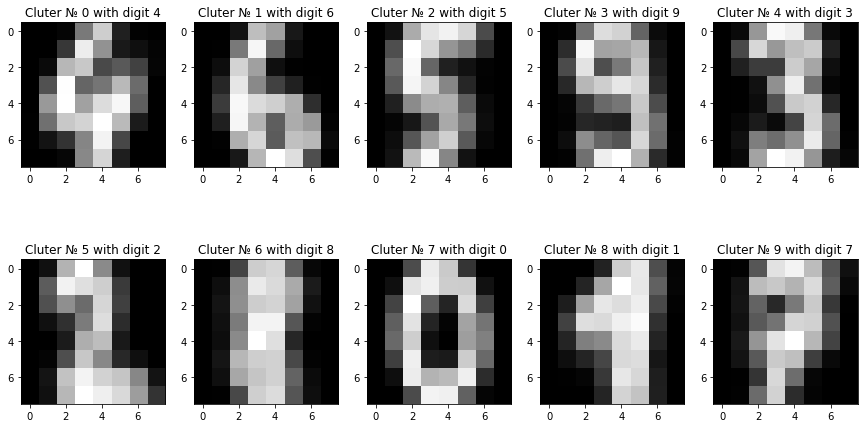

In [27]:
from sklearn.preprocessing import scale
from scipy.cluster.vq import kmeans
import numpy as np
import matplotlib.pyplot as plt

images = digits.images.reshape((digits.images.shape[0], -1))
pred, cntrd, cluster_to_digit = solve(10)

plt.figure(figsize=(15,8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('Cluter № {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(cntrd[i].reshape((8, 8)), cmap='gray')

№2

In [25]:
def error_rate(true, pred):
    return np.count_nonzero(true != pred) / true.size

In [24]:
print('Error', error_rate(digits.target, pred))

Error 0.2109070673344463


№3

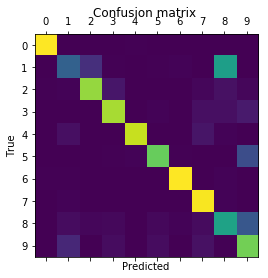

In [31]:
def confusion_matrix(true, pred):
    num_types = max(true.max(), pred.max()) + 1
    conf_matr =  np.array([[np.count_nonzero((true == i) & (pred == j)) for j in range(num_types)] for i in range(num_types)])
    plt.matshow(conf_matr)
    plt.xticks(range(num_types))
    plt.yticks(range(num_types))
    plt.title('Confusion matrix ')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
confusion_matrix(digits.target, pred)

Лучше всего предсказываются цифры 0, 4, 6, 7.
Больше всех путаются цифры 1, 8, 9

№4

Каличество кластеров, при котором ошибка наименьшая =  48
Минимальная ошибка  0.04618809126321647


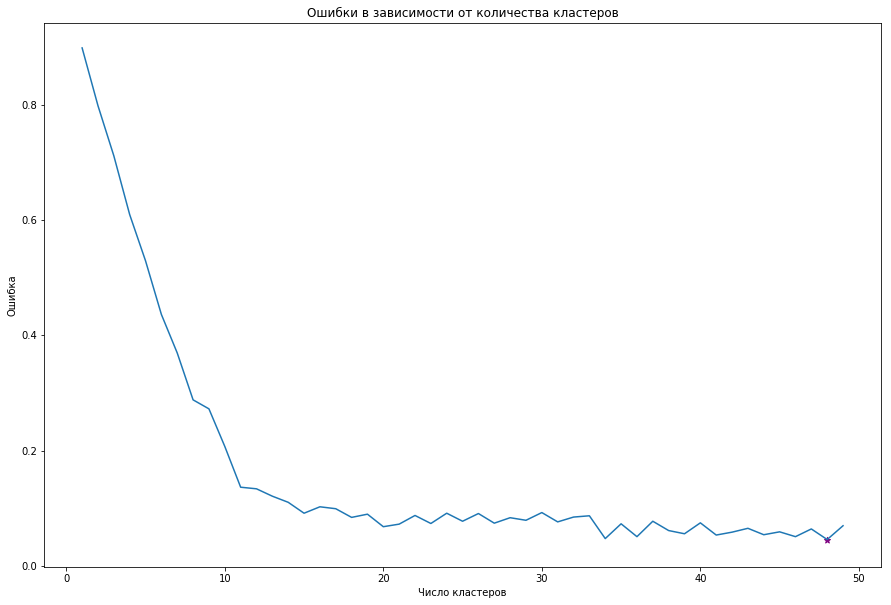

In [42]:
k_range = range(1, 50)
errors = [error_rate(digits.target, solve(k)[0]) for k in k_range]

plt.figure(figsize=(15,10))
plt.title('Ошибки в зависимости от количества кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Ошибка')
plt.plot(k_range, errors)
plt.scatter(np.argmin(errors)+k_range[0],np.min(errors), color='purple',s=40,marker='*')
print ( "Каличество кластеров, при котором ошибка наименьшая = ", np.argmin(errors)+k_range[0])
print ( "Минимальная ошибка ", min(errors))

Приблизительно после k=17 ошибка меняется незначительно, поэтому не обязательно брать k = 48. 

In [45]:
print (errors[20])

0.07289927657206455


Ошибки отличаются менее чем на 0,03.

№5

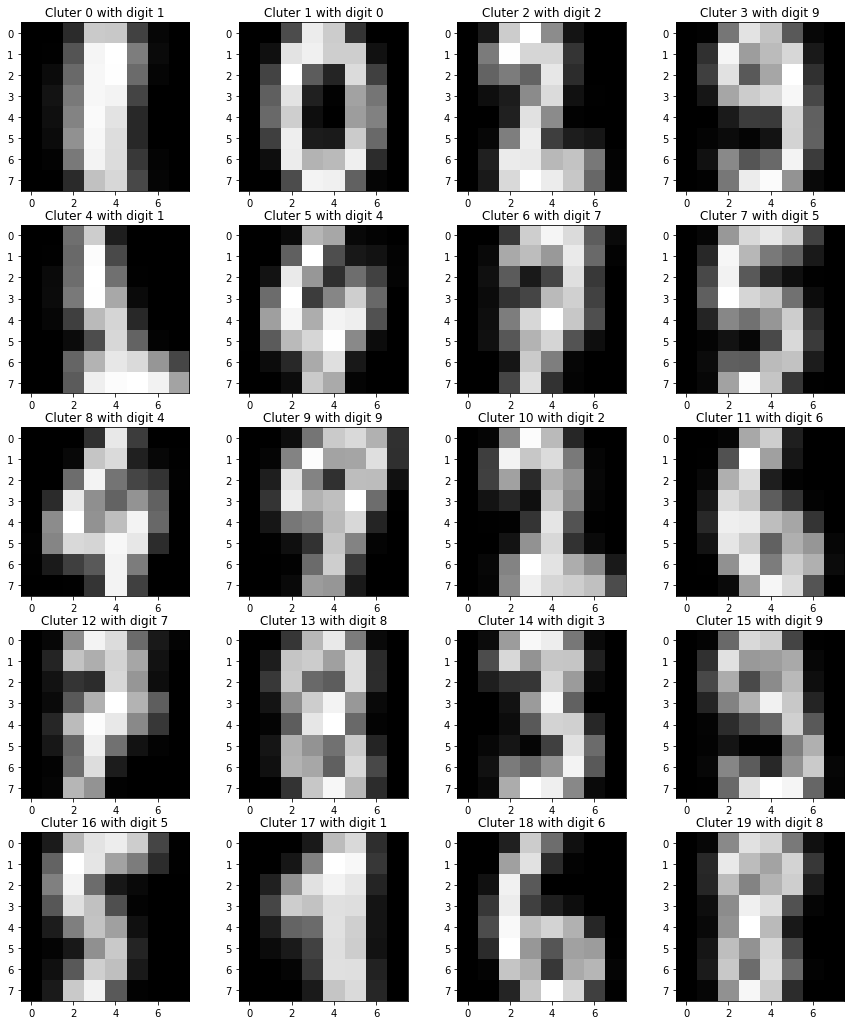

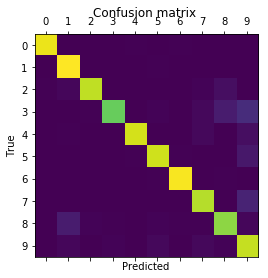

In [51]:
pred, cntrd, cluster_to_digit = solve(20)

plt.figure(figsize=(15,18))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(cntrd[i].reshape((8, 8)), cmap='gray')
    
confusion_matrix(digits.target, pred)

Цифрам 0,3 соответствует 1 кластер, цифрам 2, 4, 5, 6, 7, 8- два, цифрам 1, 9 -три кластера. При увеличении количества кластеров точность модели увеличивается.